In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
T = 365 # days
N0 = 1000
I0 = 10
R0 = 0
S0 = 990

In [3]:
# infection rate
def beta(t):
    return 0.3 + 0.1*math.cos(2*math.pi*t/365)

# recovery rate
def gamma(t):
    return 0.1 + 0.05*math.sin(2*math.pi*t/30)

In [4]:
def s(S, I, t):
    return -beta(t)*S*I

def i(S, I, t):
    return beta(t)*S*I - gamma(t)*I

def r(S, I, t):
    return gamma(t)*I

In [5]:
dt = 0.001
t = np.linspace(0, T, int(T/dt) + 1)

In [6]:
# Estimate by Runge-Kutta Method
S_rk = np.zeros(len(t))
S_rk[0] = S0

I_rk = np.zeros(len(t))
I_rk[0] = I0

R_rk = np.zeros(len(t))
R_rk[0] = R0

for it in range(1, len(t)):    
    xk1 = s(S_rk[it-1], I_rk[it-1], t[it])
    yk1 = i(S_rk[it-1], I_rk[it-1], t[it])
    zk1 = r(S_rk[it-1], I_rk[it-1], t[it])
    xk2 = s(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2, t[it])
    yk2 = i(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2, t[it])
    zk2 = r(S_rk[it-1] + xk1 * dt/2, I_rk[it-1] + yk1 * dt/2, t[it])
    xk3 = s(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2, t[it])
    yk3 = i(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2, t[it])
    zk3 = r(S_rk[it-1] + xk2 * dt/2, I_rk[it-1] + yk2 * dt/2, t[it])
    xk4 = s(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt, t[it])
    yk4 = i(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt, t[it])
    zk4 = r(S_rk[it-1] + xk3 * dt, I_rk[it-1] + yk3 * dt, t[it])

    S_rk[it] = S_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    I_rk[it] = I_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
    R_rk[it] = R_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)
    # R_rk[it] = N0 - S_rk[it] - I_rk[it]

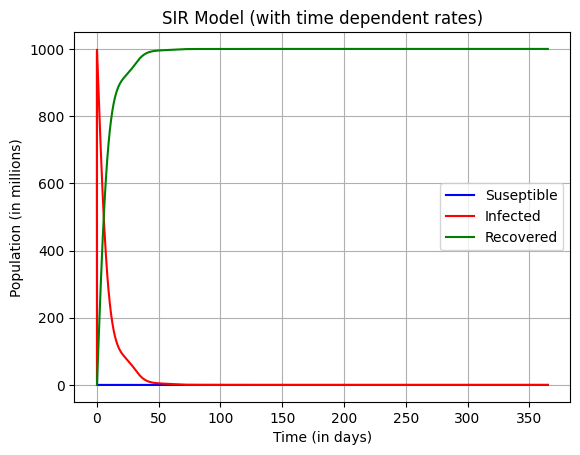

In [7]:
plt.plot(t, S_rk, label='Suseptible', color='blue')
plt.plot(t, I_rk, label='Infected', color='red')
plt.plot(t, R_rk, label='Recovered', color='green')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('SIR Model (with time dependent rates)')
plt.legend()
plt.grid()

plt.show()